In [1]:
%load_ext autoreload
%autoreload 2

import sys

# implementation of reverse_shuffle
sys.path.insert(0, "/Users/user/git/eli5/")
import eli5

sys.path.insert(0, "/Users/user/git/datasci")
from sci.metrics import rmse, rmse_score, neg_rmse_score
import sci.plots as scip
import sci.learn as scil

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)


import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x)) #Limiting floats output to 3 decimal points
pd.options.display.max_rows = 1000

random_state = 7

modified eli5
modified PermutationImportance sklearn


/Users/user/miniconda3/envs/test2/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Load Data

In [2]:
data = scil.load_data("processed_my2", random_state=random_state)

print("train:", data.X_train.shape)
print("test:", data.X_test.shape)

(891, 16) (891,)
train: (712, 16)
test: (179, 16)


## Choose Model

In [3]:
from sklearn.model_selection import *

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import *
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier, XGBRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

from MeanModels import MeanModelsClassifier, MeanModelsRegressor
from StackingAveragedModels import StackingAveragedModels

## Setup

In [4]:
from mlxtend.evaluate import BootstrapOutOfBag, RandomHoldoutSplit
from sklearn.metrics import *

metric = accuracy_score
scoring = 'accuracy'

scil.metric_global = metric
scil.scoring_global = scoring # make_scorer(scil.metric_global, needs_proba=True)

# format
# cv_{total_splits}_{train/test-fold}
cv_1_10 = RandomHoldoutSplit(valid_size=0.1, stratify=True, random_seed=None)
cv_5_5 = 5
cv_10_10 = 10
cv_1000_10 = RepeatedStratifiedKFold(n_splits=10, n_repeats=100)
cv_1000_20 = RepeatedStratifiedKFold(n_splits=20, n_repeats=50)

cv_single = cv_1_10
cv_fast = cv_10_10
cv_slow = cv_1000_20

## Model hyper-parameter tuning

In [5]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=3)

from sklearn.svm import SVC, LinearSVC, NuSVC

model = NuSVC(probability=True, max_iter=1000)
# {'kernel': 'rbf', 'nu': 0.0006049352962834763}

Running 1000 iterations of BayesSearchCV with 'accuracy' scoring
with cv = 10
with all_data = True

mean CV 'accuracy' score: 0.6577
params: {'colsample_bylevel': 0.19270978799104835, 'colsample_bytree': 0.6990202578877375, 'gamma': 1.0984708617346566, 'learning_rate': 0.001018554496465245, 'max_depth': 12, 'min_child_weight': 8, 'n_estimators': 64, 'reg_alpha': 7.854328752333535e-08, 'reg_lambda': 2.2662305861216914e-08, 'subsample': 0.16410612157407645}

.
mean CV 'accuracy' score: 0.7273
params: {'colsample_bylevel': 0.012275626780211178, 'colsample_bytree': 0.9857088742927426, 'gamma': 2.757040375653254e-05, 'learning_rate': 0.0004087342055784966, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 34, 'reg_alpha': 5.354137586918994e-07, 'reg_lambda': 166.83108518054195, 'subsample': 0.7637833536218204}

.
mean CV 'accuracy' score: 0.7800
params: {'colsample_bylevel': 0.6333182623387617, 'colsample_bytree': 0.5294143007703018, 'gamma': 3.487106160072227e-09, 'learning_rate': 0.0

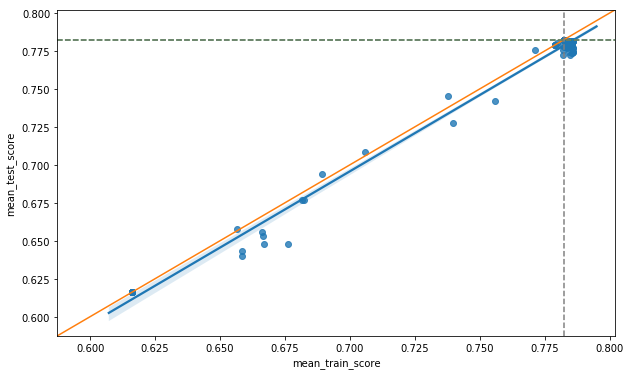

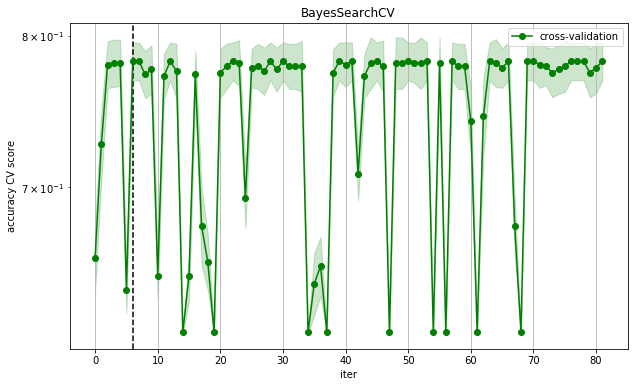

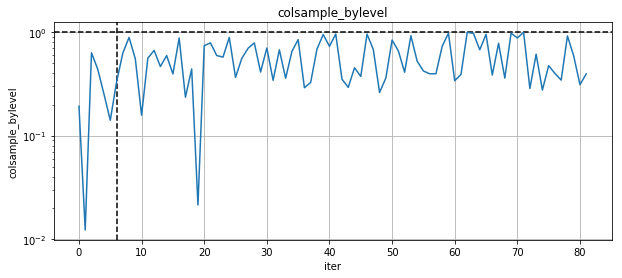

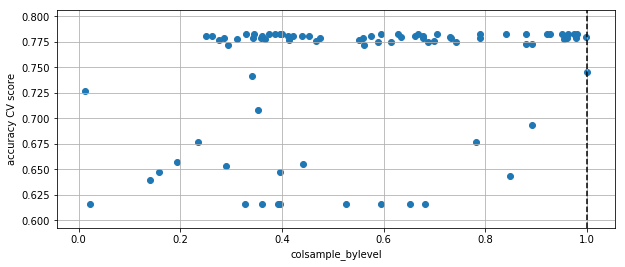

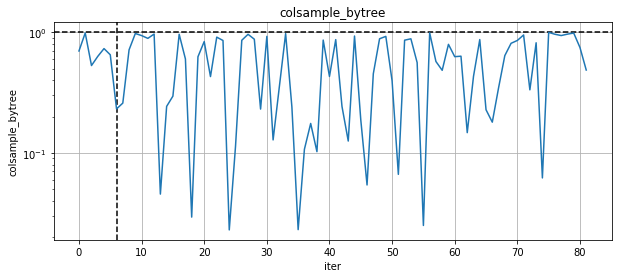

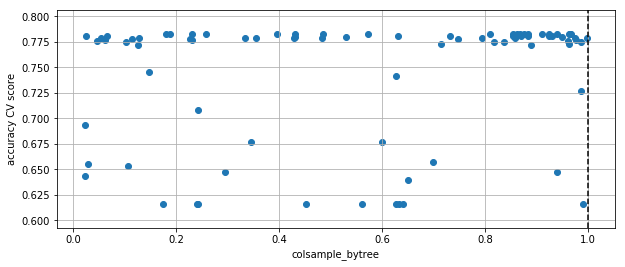

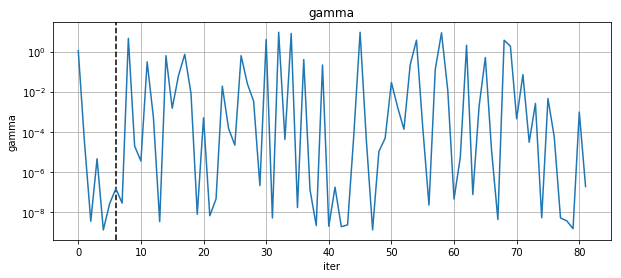

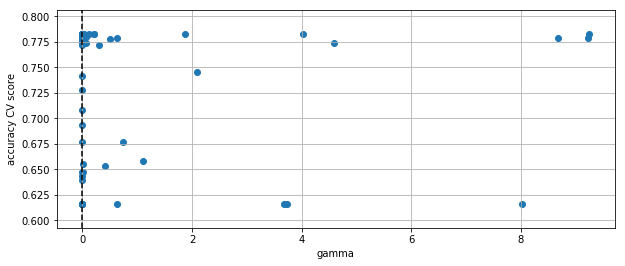

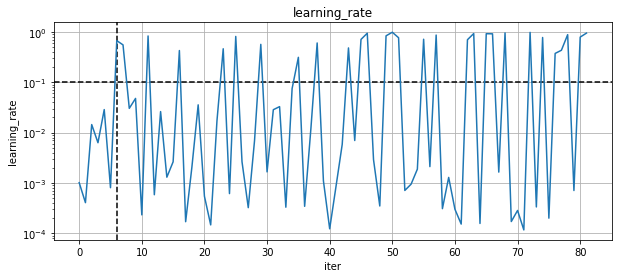

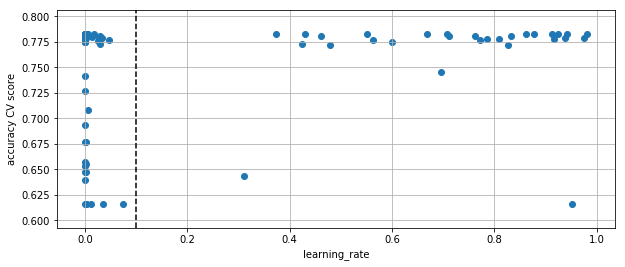

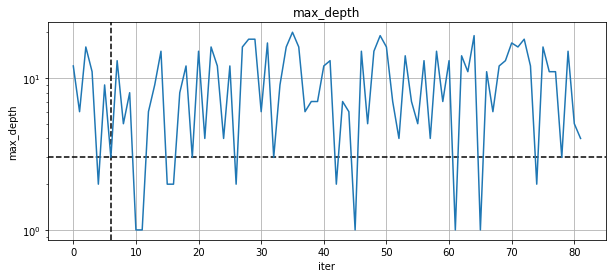

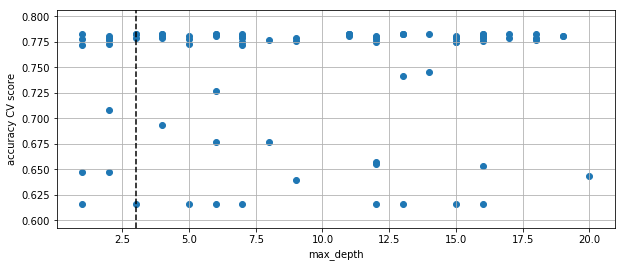

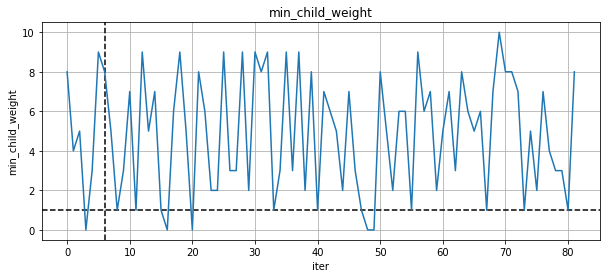

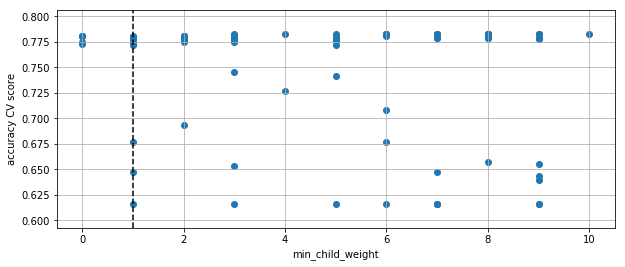

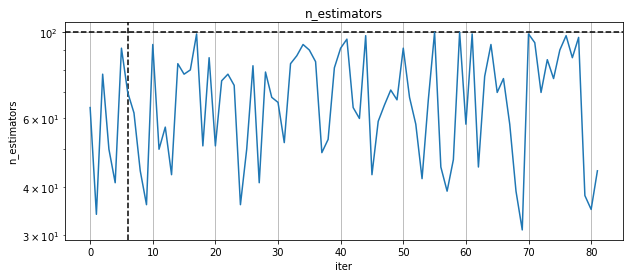

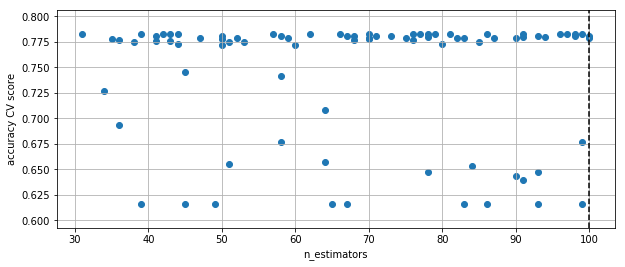

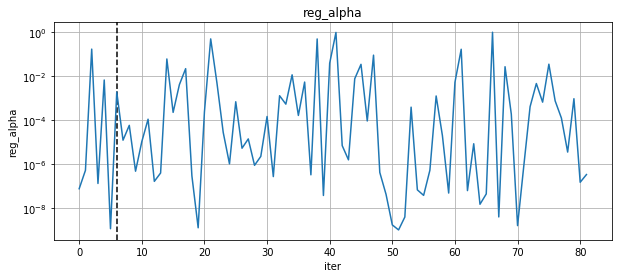

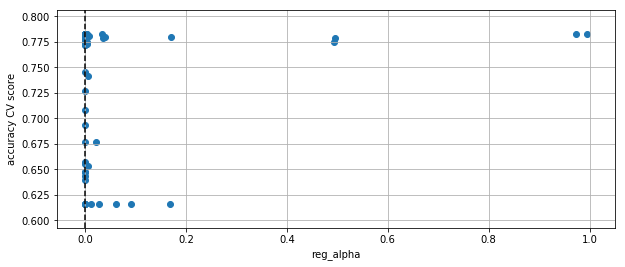

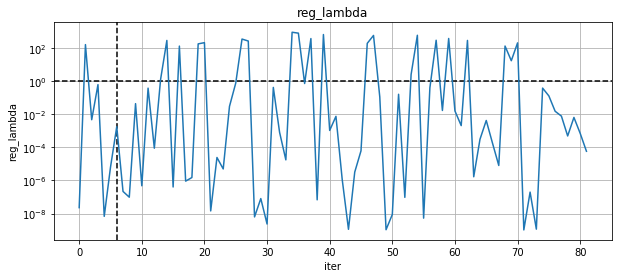

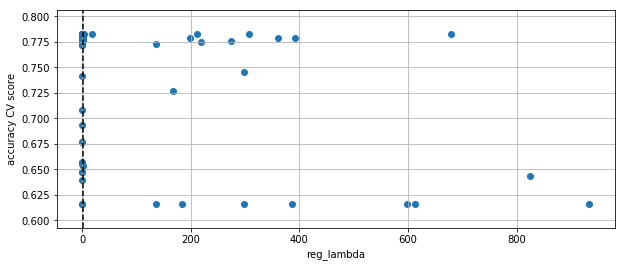

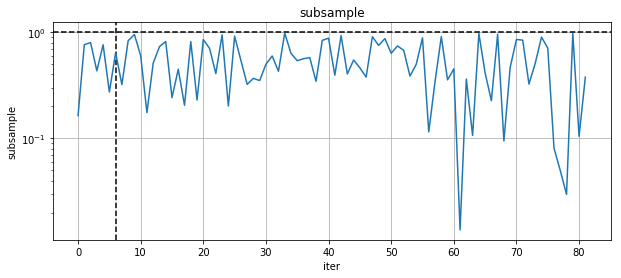

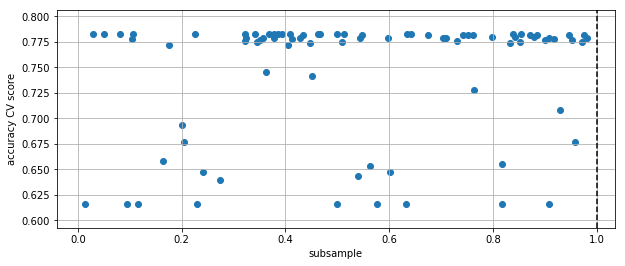

In [211]:
model = xgboost.XGBClassifier()
# model.set_params(**{'colsample_bylevel': 0.796352077652769, 'colsample_bytree': 0.7361688500878086, 'gamma': 5.490411656750404e-09, 'learning_rate': 0.0010067591662083176, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 859, 'reg_alpha': 0.0025126510732515804, 'reg_lambda': 6.5078993284825925e-09, 'subsample': 0.9573269440197754})

model = model
cv = cv_fast
ss = {
    'n_estimators': (30, 100),
    'learning_rate': (0.0001, 1.0, 'log-uniform'),
    'max_depth': (1, 20),
    'subsample': (0.01, 1.0, 'uniform'),
    'gamma': (1e-09, 10, 'log-uniform'),
    'min_child_weight': (0, 10),
    'reg_lambda': (1e-09, 1000, 'log-uniform'),
    'reg_alpha': (1e-09, 1.0, 'log-uniform'),
    'colsample_bytree': (0.01, 1.0, 'uniform'),
    'colsample_bylevel': (0.01, 1.0, 'uniform'),
}

# model = LogisticRegression()
# ss = None

scil.bayes_search(data, model, n_iter=1000, n_initial_points=20, early_stop=None, search_spaces=ss, scoring=scoring, cv=cv, all_data=True, error_score=0)
# sci.bayes_search(data, model, scoring=sci.scoring_global, cv=RepeatedKFold(5, 1), all_data=True)


In [213]:
scil.score_cv(data, model, scoring, cv=cv_fast, params=None)
scil.score_cv(data, model, scoring, cv=cv_fast, params=sci.learn_bayes.bayes_cv_tuner.good_params_)
scil.score_cv(data, model, scoring, cv=cv_fast, params=sci.learn_bayes.bayes_cv_tuner.best_params_)

CV for XGBClassifier ..
CV score: 0.776747 +/- 0.0175 SEM
CV for XGBClassifier ..
CV score: 0.782303 +/- 0.0137 SEM
CV for XGBClassifier ..
CV score: 0.782303 +/- 0.0137 SEM


using cv = 10
# Tuning hyper-parameters for accuracy

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    1.7s
[Parallel(n_jobs=11)]: Done 473 tasks      | elapsed:    3.9s
[Parallel(n_jobs=11)]: Done 1473 tasks      | elapsed:    8.4s
[Parallel(n_jobs=11)]: Done 1600 out of 1600 | elapsed:    9.0s finished


Best parameters set found on development set:

{'gamma': 10.0}

Grid scores on development set:

name: 	cross-validation	mean:	0.7766554433221099	std:	0.052493317774943114
name: 	train	mean:	0.7858852520054104	std:	0.005841813229110708
name: 	cross-validation	mean:	0.7754395809951364	std:	0.05209364523258798
name: 	train	mean:	0.7857709544160505	std:	0.005940964445576655
name: 	cross-validation	mean:	0.7765432098765432	std:	0.05249385695764689
name: 	train	mean:	0.7858790175914454	std:	0.005842782978531569
name: 	cross-validation	mean:	0.7781518892630004	std:	0.05126838313936969
name: 	train	mean:	0.7857814098051824	std:	0.005865080454228574
name: 	cross-validation	mean:	0.7764683875794987	std:	0.05123903624640214
name: 	train	mean:	0.7855006537839436	std:	0.005804914572673069
name: 	cross-validation	mean:	0.776961534537292	std:	0.051232090350717546
name: 	train	mean:	0.7854429489558613	std:	0.005766643793983142
name: 	cross-validation	mean:	0.7766554433221099	std:	0.05249331777494311


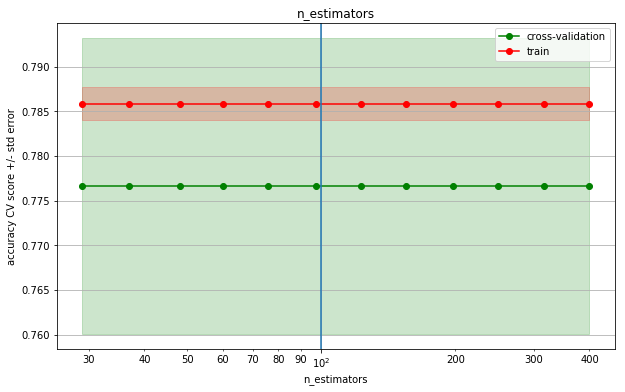

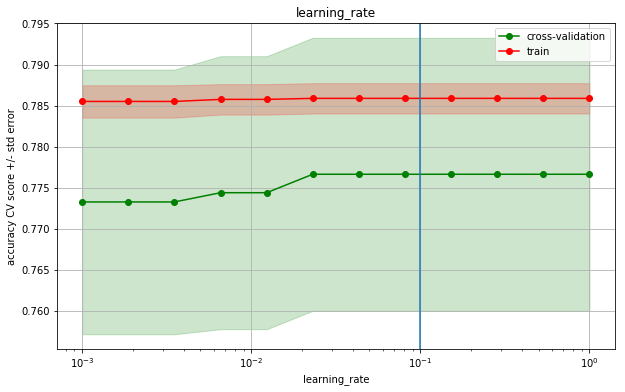

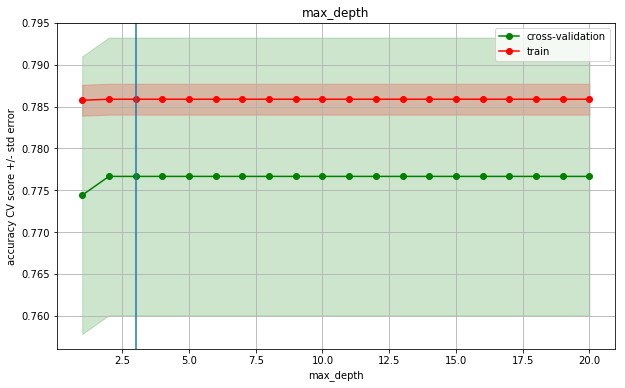

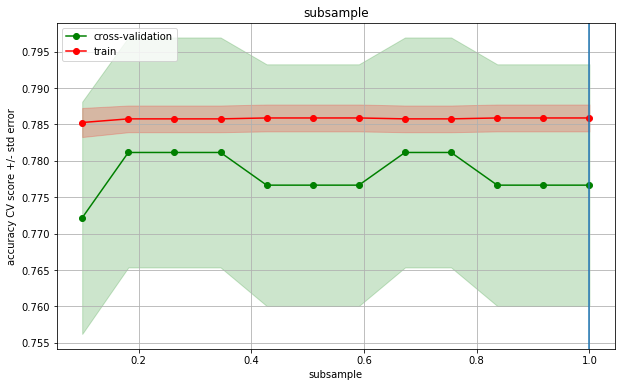

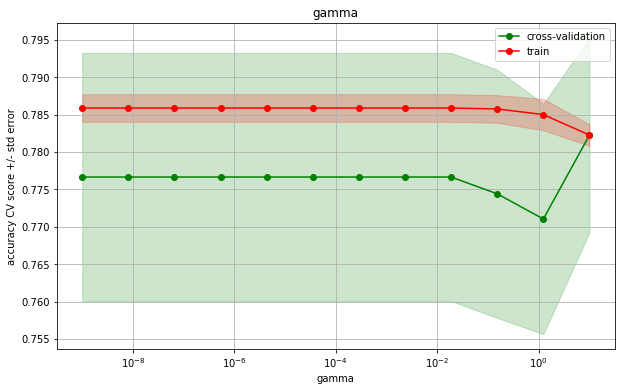

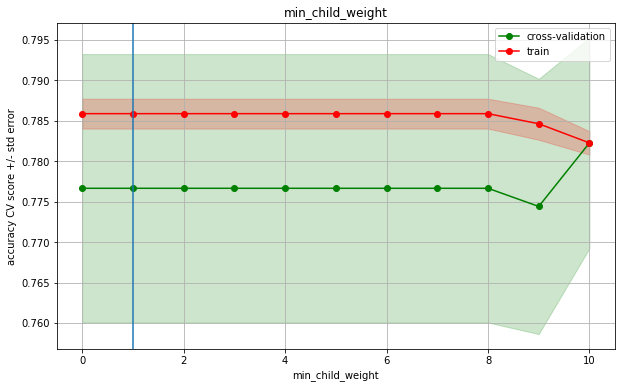

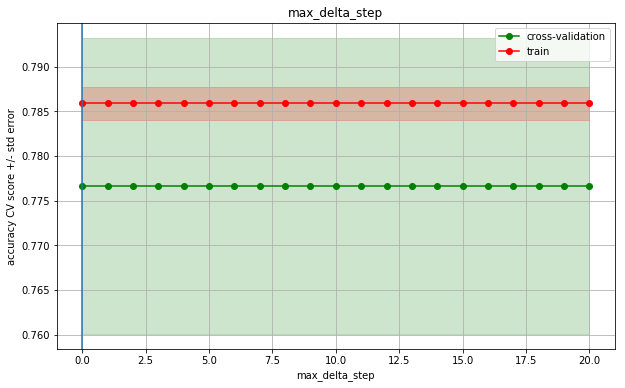

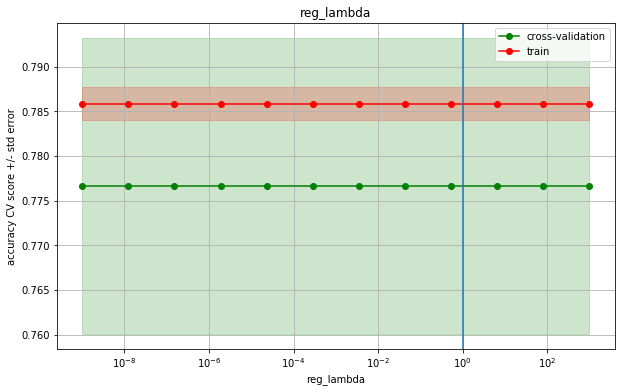

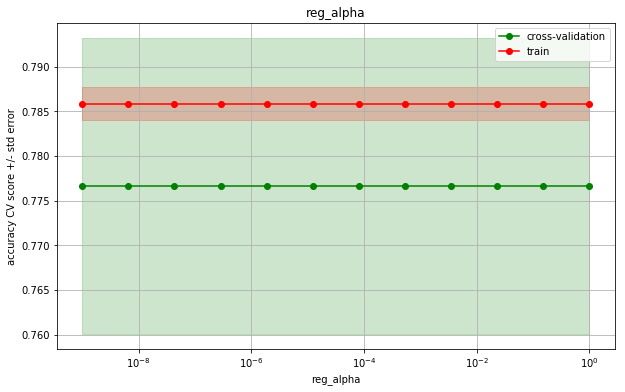

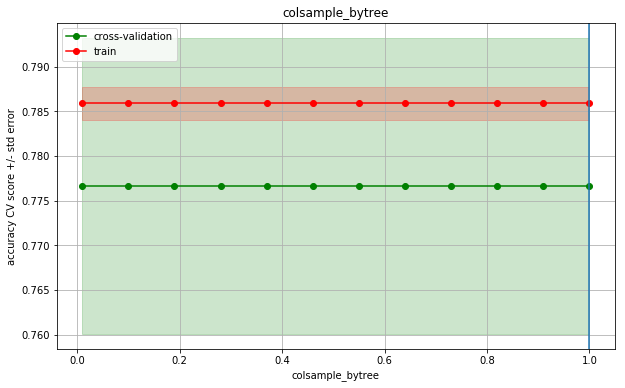

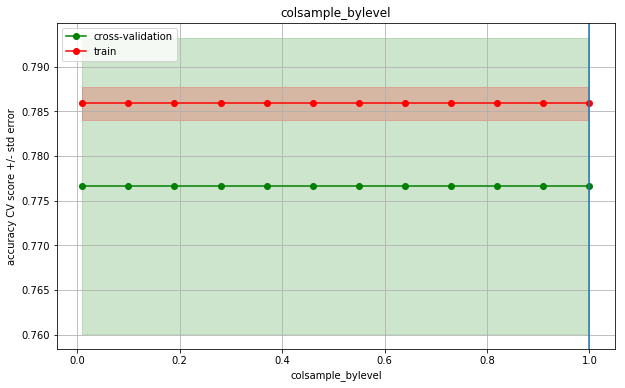

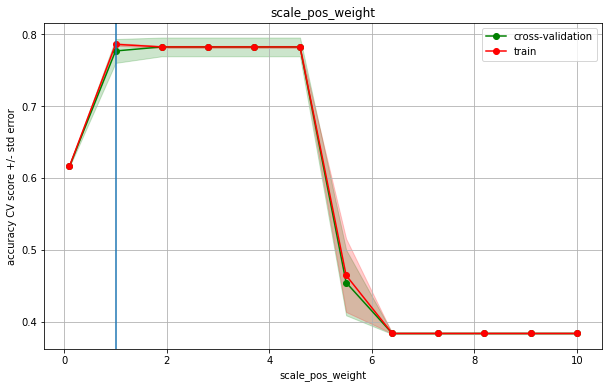

In [212]:
import ml

# search_spaces = [{'param1': range, 'param2': range}]   # cartesian product
# search_spaces = [{'param1': range}, {'param2': range}] # seperate runs
def grid_search(data, model, search_spaces=None, cv=None, scores=None, res=12):
    if cv is None:
        cv = 5
        # cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=0)
    print(f'using cv = {cv}')

    if search_spaces is None:
        search_spaces = [
            {'n_estimators': (30, 400, 'int-log-uniform')},
            {'learning_rate': (0.001, 1.0, 'log-uniform')},
            {'max_depth': (1, 20)},
            {'subsample': (0.1, 1.0, 'uniform')},
            {'gamma': (1e-9, 10, 'log-uniform')},

            {'min_child_weight': (0, 10)},
            {'max_delta_step': (0, 20)},
            {'reg_lambda': (1e-9, 1000, 'log-uniform')},
            {'reg_alpha': (1e-9, 1.0, 'log-uniform')},

            {'colsample_bytree': (0.01, 1.0, 'uniform')},
            {'colsample_bylevel': (0.01, 1.0, 'uniform')},
            {'scale_pos_weight': (0.1, 10, 'uniform')},
        ]

            # search_spaces = [
            #     {'learning_rate': np.geomspace(0.01, 0.5, res)}, 
            #     {'n_estimators': np.geomspace(10, 500, res).astype(int)}, 
            #     {'max_depth': np.arange(1, 10)},
            #     {'subsample': np.linspace(0.2, 1, 16)},
            #     {'gamma': np.r_[[0], np.geomspace(0.01, 30, res)]},

            #     {'min_child_weight': np.arange(0, 10)},
            #     {'max_delta_step': np.arange(0, 20)},
            #     {'reg_lambda': np.geomspace(1e-9, 1000, res)},
            #     {'reg_alpha': np.geomspace(1e-9, 1.0, res)},

            #     {'colsample_bytree': np.linspace(0.01, 1.0, res)},
            #     {'colsample_bylevel': np.linspace(0.01, 1.0, res)},
            #     {'scale_pos_weight': np.geomspace(1e-6, 500, res)}

            #     ]

    if scores is None:
        scores = ['accuracy']

    ml.grid_search(search_spaces, model, scores, cv=cv, resolution=res, X=data.X, y=data.y)
    # self.best_model_params = clf.best_params_

    
grid_search(data, model, cv=cv_fast)

In [129]:
man_params = {
    'n_estimators': 50,
    'max_depth': 3,
    'learning_rate': 0.001,
    
    'colsample_bylevel': 0.4,
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0,
    'reg_lambda': 0.1,

    'max_delta_step': 1,
    'min_child_weight': 2,
}
model.set_params(**man_params)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
       colsample_bytree=0.4, gamma=0.1, learning_rate=0.001,
       max_delta_step=1, max_depth=3, min_child_weight=2, missing=None,
       n_estimators=50, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=0.1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [131]:
scil.score_cv(data, model, scoring, cv=cv_slow)

CV for XGBClassifier ..
CV score: 0.810350 +/- 0.0018 SEM


CV for XGBClassifier ..
CV score: 0.834028 +/- 0.0156 SEM


## Compare GridSearchCV RandomSearchCV and BayesSearchCV

In [214]:
# https://www.kaggle.com/ccastleberry/titanic-cabin-features/notebook

modified PermutationImportance sklearn


In [366]:
def map_ss_to_grid(ss, res=5):
    # map the search_spaces config that is siimlar to bayes_search to that which is required by grid_search
    ss_new = {}
    for k, v in ss.items():
        if len(v) == 2:
            ss_new[k] = np.arange(v[0], v[1]+1) # (1, 10) => np.arange(1, 10+1)
            v = (v[0], v[1], "int-uniform")
        if len(v) == 3:
            if v[2] == "uniform":
                ss_new[k] = np.linspace(v[0], v[1], res) # (0.1, 1.0, 'uniform') => np.linspace(0.1, 1.0, res)
            elif v[2] == "int-uniform":
                ss_new[k] = np.unique(np.linspace(v[0], v[1], res).astype(int)) # (0.1, 1.0, 'int-uniform') => np.linspace(0.1, 1.0, res)
            elif v[2] == "log-uniform":
                ss_new[k] = np.geomspace(v[0], v[1], res) # (0.1, 1.0, 'log-uniform') => np.geomspace(0.1, 1.0, res)
            elif v[2] == "int-log-uniform":
                ss_new[k] = np.geomspace(v[0], v[1], res).astype(int) # (0.1, 1.0, 'log-uniform') => np.geomspace(0.1, 1.0, res)
            else:
                raise ValueError(f"unexpected search_space type: {v[2]}")
        else:
            raise ValueError(f"unexpected search_space len: {len(v)}")
    return ss_new


In [155]:
import sci.learn_bayes

early_stop = 20

best_test_score_so_far = None
best_train_score_so_far = None
good_score_so_far = None
iter_count = 0
no_improvement_count = 0

def on_step(bayes_cv_tuner, optim_result):
    global clf_bayes
    global best_test_score_so_far, iter_count, no_improvement_count, good_score_so_far, best_train_score_so_far
    
    # first run
    if len(bayes_cv_tuner.cv_results_['mean_train_score']) == 1:
        best_test_score_so_far = None
        best_train_score_so_far = None
        good_score_so_far = None
        iter_count = 0
        no_improvement_count = 0
        
    best_test_score = bayes_cv_tuner.best_score_
    good_train_score, good_test_score, good_params_, good_idx = sci.learn_bayes.bayes_get_good_model(bayes_cv_tuner)
    if best_test_score != best_test_score_so_far or good_test_score != good_score_so_far: 
        no_improvement_count = 0
        if  good_test_score != good_score_so_far:
            good_score_so_far = good_test_score
        if best_test_score != best_test_score_so_far:
            best_test_score_so_far = best_test_score
        best_train_score = bayes_cv_tuner.cv_results_['mean_train_score'][bayes_cv_tuner.best_index_]

        print()
        print(f"best_test: {best_test_score:.4f}, best_train: {best_train_score:.4f}, good_test: {good_test_score:.4f}, good_train: {good_train_score:.4f}")
        if bayes_cv_tuner.best_params_:
            print(f'params: {" | ".join(f"{k}: {v}" for k, v in bayes_cv_tuner.best_params_.items())}')
        print()
    else:
        no_improvement_count += 1
        if early_stop and no_improvement_count >= early_stop:
            print()
            print(
                f'stopping early after {early_stop} iterations with no improvement')
            return True
    iter_count += 1
    print(".", end='')
    if iter_count % 10 == 0:
        print(f'{iter_count}/{n_iter}', end='')
#     if score >= 0.98:
#         print('Interrupting!')
#         return True


In [728]:
from sklearn.model_selection import *
import numpy as np
sys.path.insert(0, "/Users/user/git/sklearn-deap/")
from evolutionary_search import EvolutionaryAlgorithmSearchCV

import scipy.stats as st
from skopt import BayesSearchCV
import sci.features as scif
import sklearn.datasets
from sklearn.ensemble import *
# ds = sklearn.datasets.load_digits()
# X = ds["data"]
# y = ds["target"]
# # make it a 2-class problem by only classifying the digit "5" vs the rest
# y = np.array([1 if yy == 5 else 0 for yy in y])

data.X = scif.drop_str_features(data.X)
data.split()
X, y = data.X_train, data.y_train
X = X.astype(float)

model = xgboost.XGBClassifier()
# model = BaggingClassifier(xgboost.XGBClassifier(), n_estimators=30, max_samples=0.9)
# model = SVC()
cv = 2
scoring = "average_precision"
# scoring = "accuracy"
n_iter = 300
error_score = np.nan # 'raise'
random_state = 0
verbose = 1
refit = True

import scipy.stats as stat
stat.randint
stat.expon
stat.uniform
ss_bayes = {
    'n_estimators': (30, 100),
    'learning_rate': (0.0001, 1.0, 'log-uniform'),
    'max_depth': (1, 20),
    'subsample': (0.01, 1.0, 'uniform'),
    'gamma': (1e-09, 10, 'log-uniform'),
    'min_child_weight': (0, 10),
    'reg_lambda': (1e-09, 1000, 'log-uniform'),
    'reg_alpha': (1e-09, 1.0, 'log-uniform'),
    'colsample_bytree': (0.01, 1.0, 'uniform'),
    'colsample_bylevel': (0.01, 1.0, 'uniform'),
}

ss_rand = {
    'n_estimators': scipy.stats.randint(30, 100),
    'learning_rate': scipy.stats.expon(0.1),
    'max_depth': scipy.stats.randint(1, 20),
    'subsample': scipy.stats.uniform(0.01, 1.0-0.01),
    'gamma': scipy.stats.expon(0.1),
    'min_child_weight': scipy.stats.randint(0, 10),
    'reg_lambda': scipy.stats.expon(100),
    'reg_alpha': scipy.stats.expon(0.1),
    'colsample_bytree': scipy.stats.uniform(0.01, 1.0-0.01),
    'colsample_bylevel': scipy.stats.uniform(0.01, 1.0-0.01),
}

ss_grid = map_ss_to_grid(ss_bayes)
# ss_rand = map_ss_to_grid(ss_bayes, res=100)
ss_evo =  map_ss_to_grid(ss_bayes)
# ss_rand ={'max_depth': st.randint(6, 11),
#              'n_estimators':st.randint(300, 500),
#              'max_features':np.arange(0.5,.81, 0.05),
#             'max_leaf_nodes':st.randint(6, 10)}


# res = 5
# ss_grid = {
#             "kernel": ["rbf"],
#              "C"     : np.logspace(-9, 9, num=res, base=10),
#              "gamma" : np.logspace(-9, 9, num=res, base=10)}

# ss_evo = {"kernel": ["rbf"],
#              "C"     : np.logspace(-9, 9, num=res, base=10),
#              "gamma" : np.logspace(-9, 9, num=res, base=10)}

# ss_rand = ss_grid

# ss_bayes = {"kernel": ["rbf"],
#              "C"     : (10e-9, 10e9, 'log-uniform'),
#              "gamma" : (10e-9, 10e9, 'log-uniform'),
#            }

clf_grid = GridSearchCV(model, ss_grid, scoring=scoring, cv=cv, n_jobs=1, error_score=error_score, verbose=verbose, refit=refit,
                       )

clf_rand = RandomizedSearchCV(model, ss_rand, scoring=scoring, cv=cv, n_jobs=1, error_score=error_score, verbose=verbose, refit=refit,
                              random_state=random_state,
                              n_iter=n_iter,
                         )

clf_evo = EvolutionaryAlgorithmSearchCV(model, ss_evo, scoring=scoring, cv=cv, n_jobs=1, error_score=error_score, verbose=1, refit=refit,
                                   # deap
                                   population_size=50,
                                   gene_mutation_prob=0.1,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=10)
                                   #pmap = pool.map)

optimizer_kwargs = {'n_initial_points': 10, 'base_estimator': 'GBRT'}    
clf_bayes_gbrt = BayesSearchCV(model, ss_bayes, scoring=scoring, cv=cv, n_jobs=1, error_score=error_score, verbose=0, refit=refit,
        random_state=random_state,
        n_iter=n_iter,
        return_train_score=True,
        optimizer_kwargs=optimizer_kwargs,
    )


optimizer_kwargs = {'n_initial_points': 10, 'base_estimator': 'GP'}    
clf_bayes_gp = BayesSearchCV(model, ss_bayes, scoring=scoring, cv=cv, n_jobs=1, error_score=error_score, verbose=0, refit=refit,
        random_state=random_state,
        n_iter=n_iter,
        return_train_score=True,
        optimizer_kwargs=optimizer_kwargs,
    )

In [157]:
clfs = {
    'clf_evo': (clf_evo, {}),
    'clf_bayes_gbrt': (clf_bayes_gbrt, {'callback': lambda x: on_step(clf_bayes_gbrt, x)}),
    'clf_bayes_gp': (clf_bayes_gp, {'callback': lambda x: on_step(clf_bayes_gp, x)}),
#     'clf_grid': (clf_grid, {}),
    'clf_rand': (clf_rand, {}),
}

In [102]:
# clf_evo.fit(X, y)

In [103]:
# scil.score(data, clf_evo, scoring)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  1.7min finished



=============== best params ================
{'subsample': 1.0, 'reg_lambda': 1e-09, 'reg_alpha': 1e-09, 'n_estimators': 82, 'min_child_weight': 0, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.03162277660168379, 'colsample_bytree': 0.505, 'colsample_bylevel': 0.7525}

============ good params (at ratio 0.990): ===============
{'subsample': 0.505, 'reg_lambda': 1.0, 'reg_alpha': 1.0, 'n_estimators': 47, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1e-09, 'colsample_bytree': 0.2575, 'colsample_bylevel': 0.505}



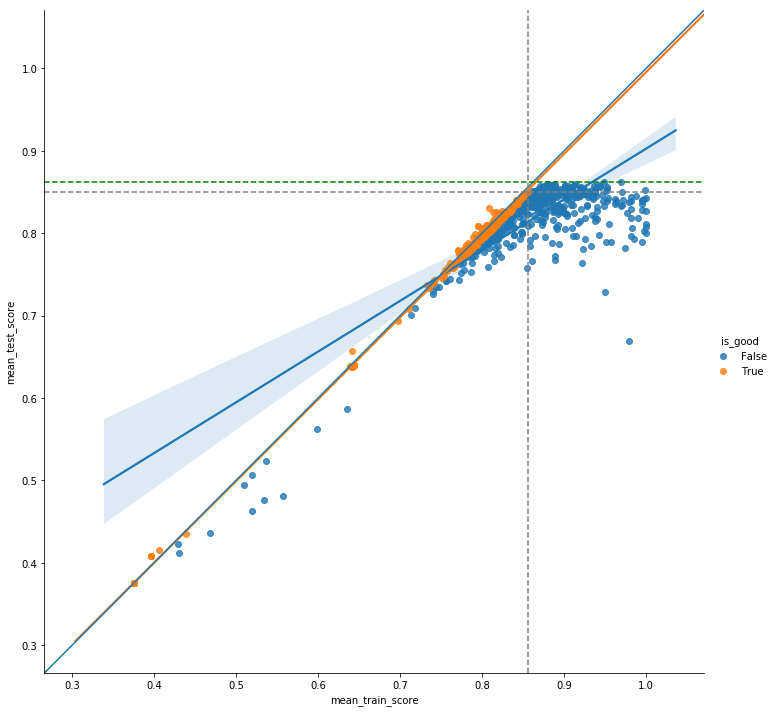

In [216]:
clf_rand = RandomizedSearchCV(model, ss_rand, scoring=scoring, cv=5, n_jobs=10, error_score=error_score, verbose=verbose, refit=refit,
                              random_state=random_state,
                              n_iter=1000,
                         )

clf_rand.fit(X, y)
scip.bayes_search_results_scatter(clf_rand)


Fitting 15 folds for each of 10000 candidates, totalling 150000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done 635 tasks      | elapsed:    6.3s
[Parallel(n_jobs=10)]: Done 2135 tasks      | elapsed:   12.7s
[Parallel(n_jobs=10)]: Done 4235 tasks      | elapsed:   20.7s
[Parallel(n_jobs=10)]: Done 6935 tasks      | elapsed:   30.7s
[Parallel(n_jobs=10)]: Done 10235 tasks      | elapsed:   43.5s
[Parallel(n_jobs=10)]: Done 14135 tasks      | elapsed:   58.1s
[Parallel(n_jobs=10)]: Done 18635 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 23735 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 29435 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 35735 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 42635 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 50135 tasks      | elapsed:  3.4min
[Parallel(n_jobs=10)]: Done 58235 tasks      | elapsed:  3.9min
[Parallel(n_jobs=10)]: Done 66935 

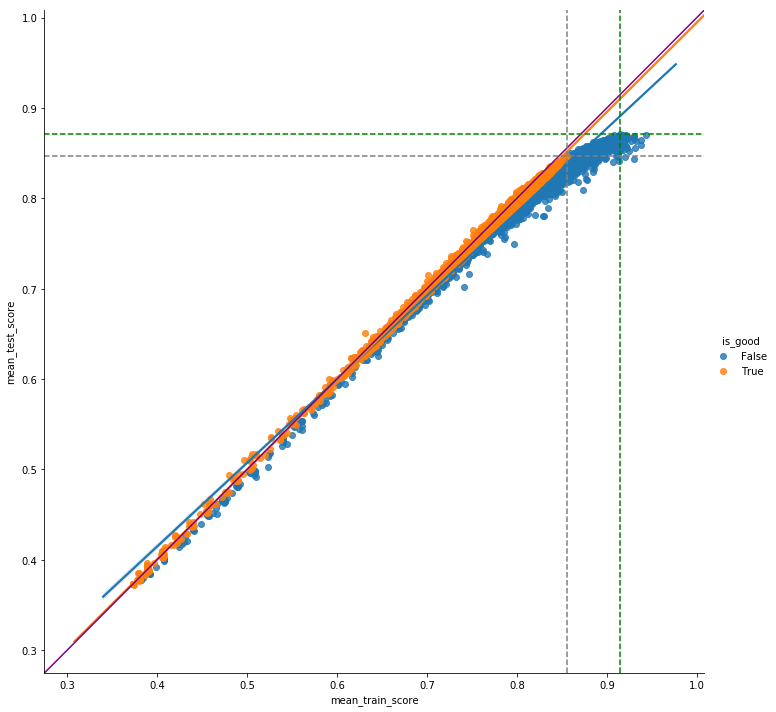

In [729]:
cv = RepeatedStratifiedKFold(5, 3)
clf_rand = RandomizedSearchCV(model, ss_rand, scoring=scoring, cv=cv, n_jobs=10, error_score=error_score, verbose=verbose, refit=refit,
                              random_state=random_state,
                              n_iter=10000,
                         )
clf_rand.fit(data.X_train, data.y_train)
scip.bayes_search_results_scatter(clf_rand)


Fitting 30 folds for each of 10000 candidates, totalling 300000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.0s
[Parallel(n_jobs=10)]: Done 949 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 2949 tasks      | elapsed:   12.5s
[Parallel(n_jobs=10)]: Done 5749 tasks      | elapsed:   23.4s
[Parallel(n_jobs=10)]: Done 9349 tasks      | elapsed:   36.7s
[Parallel(n_jobs=10)]: Done 13749 tasks      | elapsed:   54.9s
[Parallel(n_jobs=10)]: Done 18949 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 24949 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 31749 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 39349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 47749 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done 56949 tasks      | elapsed:  3.6min
[Parallel(n_jobs=10)]: Done 66949 tasks      | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done 77749 tasks      | elapsed:  5.0min
[Parallel(n_jobs=10)]: Done 89349 

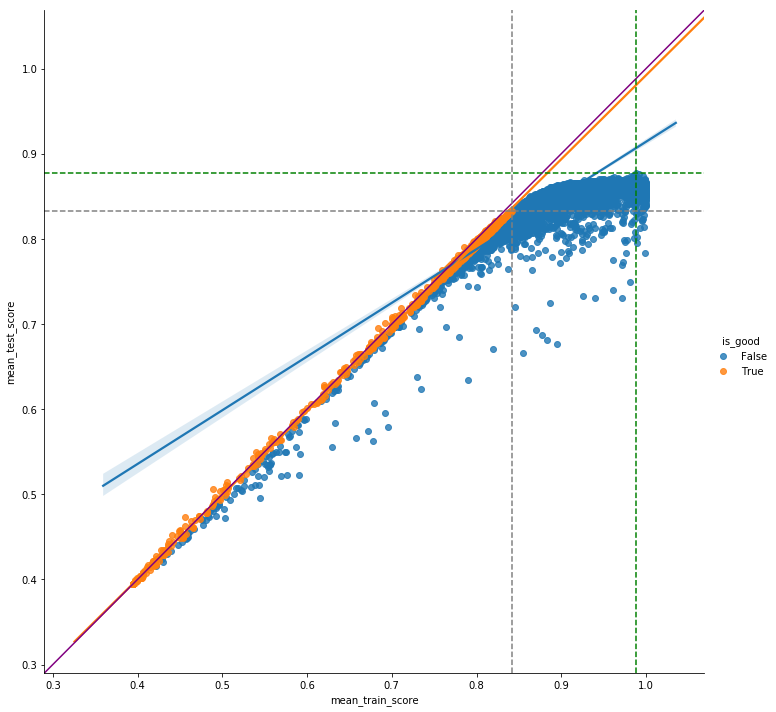

In [394]:
# using n_iter =10_000 instead of 1_000
cv = RepeatedStratifiedKFold(3, 10)
clf_rand = RandomizedSearchCV(model, ss_rand, scoring=scoring, cv=cv, n_jobs=10, error_score=error_score, verbose=verbose, refit=refit,
                              random_state=random_state,
                              n_iter=10000,
                         )
clf_rand.fit(data.X_train, data.y_train)
scip.bayes_search_results_scatter(clf_rand)


Fitting 30 folds for each of 1000 candidates, totalling 30000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done 120 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 1620 tasks      | elapsed:    5.5s
[Parallel(n_jobs=10)]: Done 4120 tasks      | elapsed:   16.3s
[Parallel(n_jobs=10)]: Done 7620 tasks      | elapsed:   29.8s
[Parallel(n_jobs=10)]: Done 12120 tasks      | elapsed:   46.1s
[Parallel(n_jobs=10)]: Done 17620 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 24120 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 30000 out of 30000 | elapsed:  1.9min finished


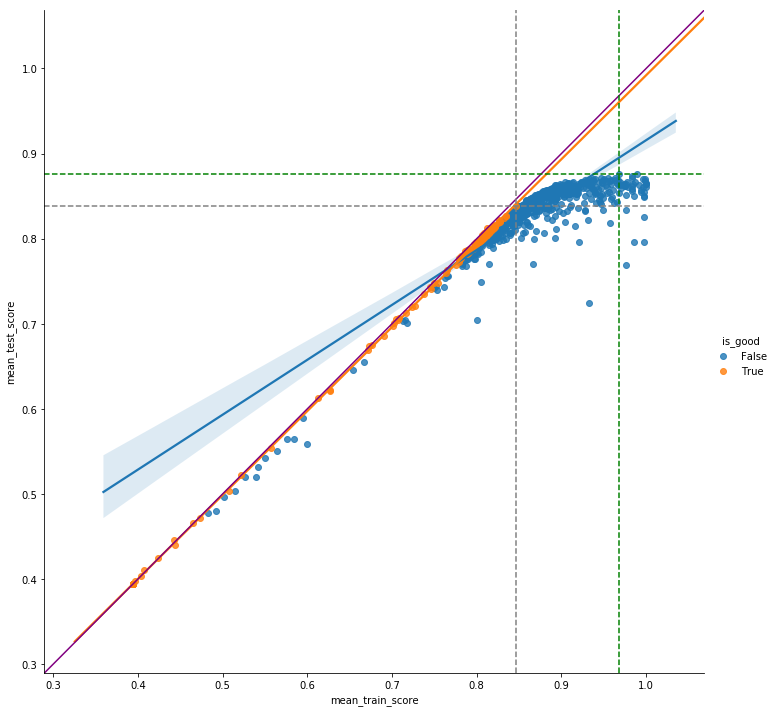

In [369]:
# using res=100 instead of res=5 for search space
cv = RepeatedStratifiedKFold(3, 10)
clf_rand = RandomizedSearchCV(model, ss_rand, scoring=scoring, cv=cv, n_jobs=10, error_score=error_score, verbose=verbose, refit=refit,
                              random_state=random_state,
                              n_iter=1000,
                         )
clf_rand.fit(data.X_train, data.y_train)
scip.bayes_search_results_scatter(clf_rand)


In [476]:
clf_rand = clf_rand2

In [427]:
clf_rand1 = clf_rand

serach_spaces:
{
    'base_estimator__n_estimators': [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100],
    'base_estimator__learning_rate': [1.00000000e-04 1.09749877e-04 1.20450354e-04 1.32194115e-04
 1.45082878e-04 1.59228279e-04 1.74752840e-04 1.91791026e-04
 2.10490414e-04 2.31012970e-04 2.53536449e-04 2.78255940e-04
 3.05385551e-04 3.35160265e-04 3.67837977e-04 4.03701726e-04
 4.43062146e-04 4.86260158e-04 5.33669923e-04 5.85702082e-04
 6.42807312e-04 7.05480231e-04 7.74263683e-04 8.49753436e-04
 9.32603347e-04 1.02353102e-03 1.12332403e-03 1.23284674e-03
 1.35304777e-03 1.48496826e-03 1.62975083e-03 1.78864953e-03
 1.96304065e-03 2.15443469e-03 2.36448941e-03 2.59502421e-03
 2.84803587e-03 3.12571585e-03 3.43046929e-03 3.76493581e-03
 4.1320124

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   12.7s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   35.6s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 1800 out of 1800 | elapsed:  2.9min finished


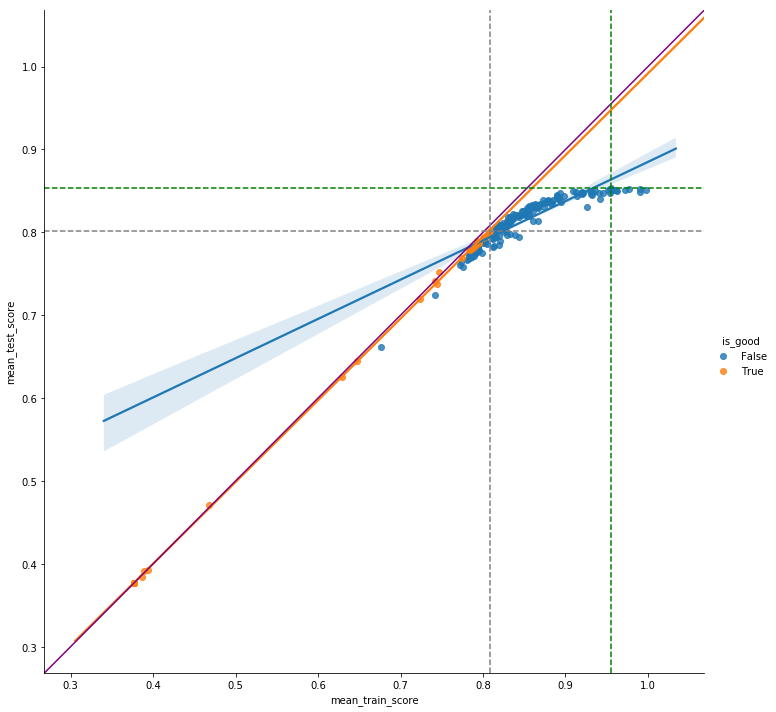

In [475]:
# using res=100 instead of res=5 for search space

import sci.learn_bayes
from sci.learn_bayes import _check_search_spaces

ss = _check_search_spaces(model, ss_rand)
cv = RepeatedStratifiedKFold(3, 3)
clf_rand2 = RandomizedSearchCV(model, ss, scoring=scoring, cv=cv, n_jobs=10, error_score=error_score, verbose=verbose, refit=refit,
                              random_state=random_state,
                              n_iter=200,
                         )
clf_rand2.fit(data.X_train, data.y_train)
scip.bayes_search_results_scatter(clf_rand2)


In [730]:
models = []
for p in clf_rand.cv_results_['params']:
    model = clone(model)
    model.set_params(**p)
    model.fit(data.X_train, data.y_train)
    models.append(model)
scorer = get_scorer(scoring)

In [731]:
holdout_scores = [scorer(model, data.X_test, data.y_test) for model in models]
fulltrain_scores = [scorer(model, data.X_train, data.y_train) for model in models]

In [732]:
df = pd.DataFrame(clf_rand.cv_results_)
df["holdout_score"] = holdout_scores
df["fulltrain_scores"] = fulltrain_scores
# df["ratio"] = df.mean_test_score  / df.mean_train_score


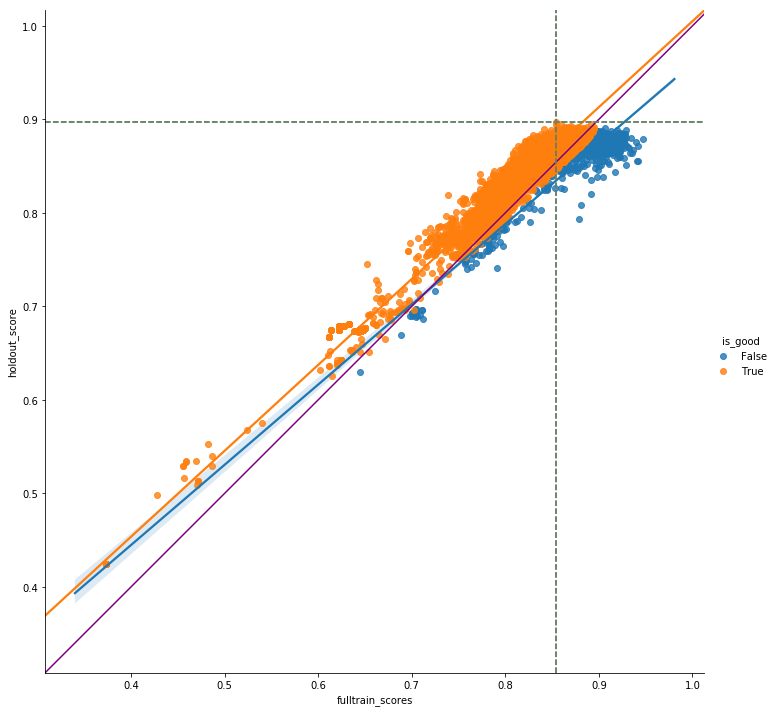

In [733]:
scip.cv_results_scatter_xy(df.fulltrain_scores, df.holdout_score)

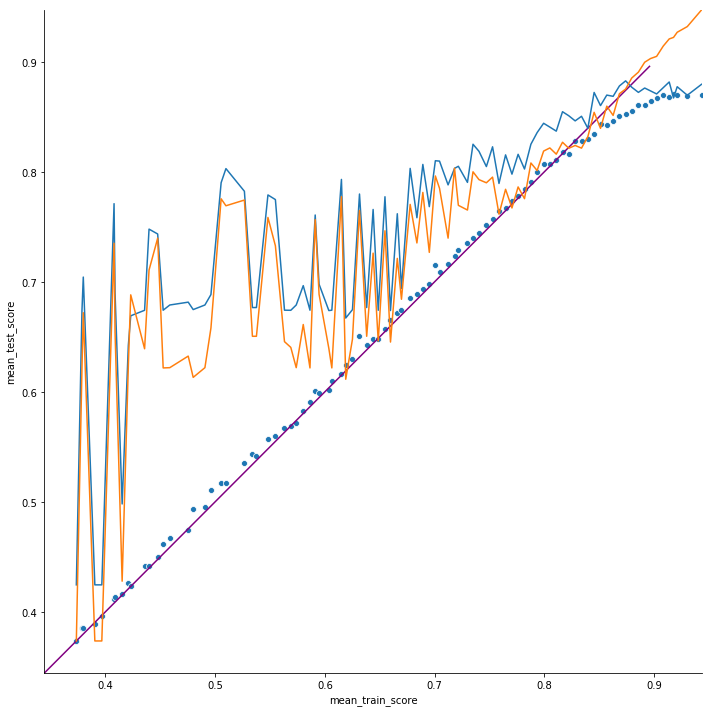

In [734]:
idx = scip.get_cv_results_eff_idx(df, "mean_train_score", "mean_test_score")
sdf = df.loc[idx]
sdf = sdf.reset_index()
sdf = sdf[~sdf["index"].duplicated(keep='first')]

# sdf.index = np.arange(sdf.shape[0])
sns.relplot('mean_train_score', 'mean_test_score', data=sdf, aspect=1, height=10)
# sns.lmplot('mean_train_score', 'fulltrain_scores', data=sdf, aspect=1, height=10)
# sns.lmplot('fulltrain_scores', 'holdout_score', data=sdf, aspect=1, height=10)
# sns.lmplot('mean_train_score', 'holdout_score', data=sdf, aspect=1, height=10)
# sns.lmplot('mean_test_score', 'holdout_score', data=sdf, aspect=1, height=10)
# sns.lmplot('ratio', 'holdout_score', data=sdf, aspect=1, height=10)
import sci.plots as scip
scip.diag_line()
plt.plot(sdf.mean_train_score, sdf.holdout_score)
plt.plot(sdf.mean_train_score, sdf.fulltrain_scores)
# plt.plot(sdf.mean_train_score, sdf.mean_test_score)


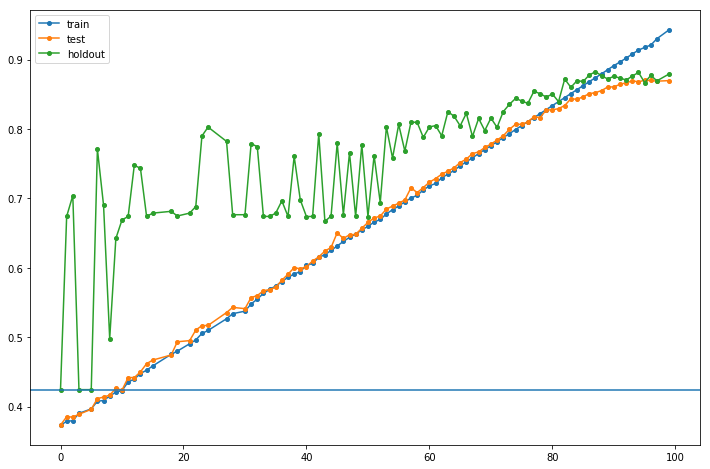

In [735]:
# the implied "complexity" validation curve
plt.figure(figsize=(12, 8))
plt.plot(sdf.mean_train_score, label="train", marker='o', markersize=4)
plt.plot(sdf.mean_test_score, label="test", marker='o', markersize=4)
plt.plot(sdf.holdout_score, label="holdout", marker='o', markersize=4)
plt.legend()

plt.axhline(average_precision_score(data.y_test, np.zeros_like(data.y_test)+1))

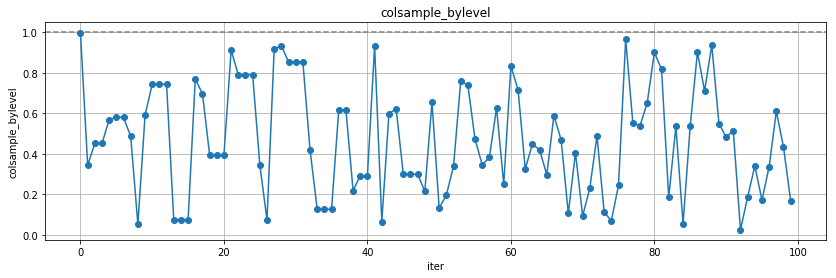

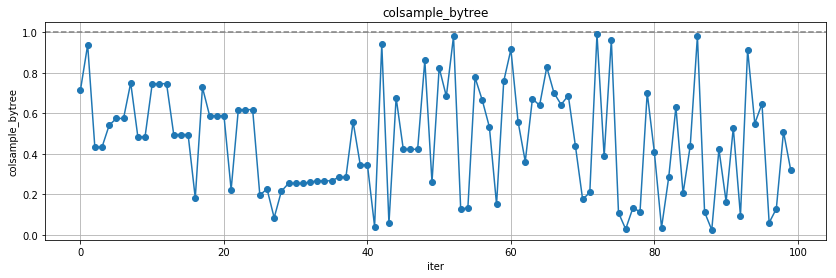

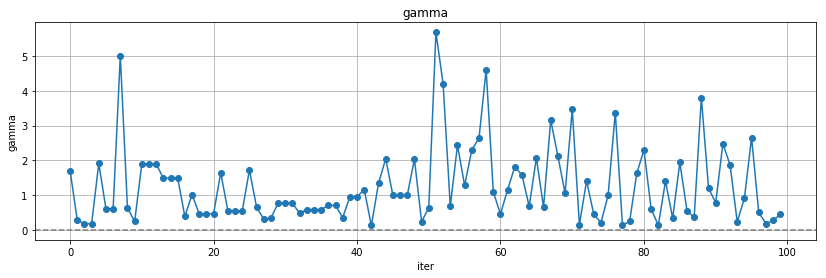

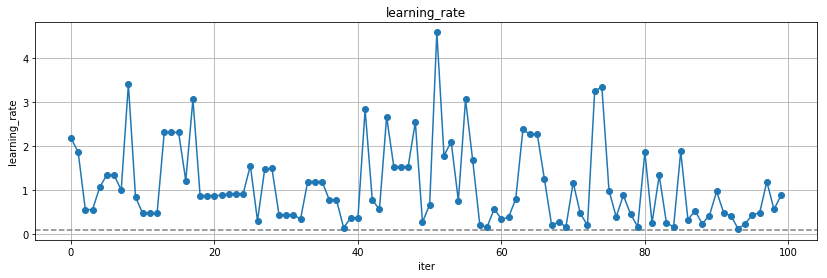

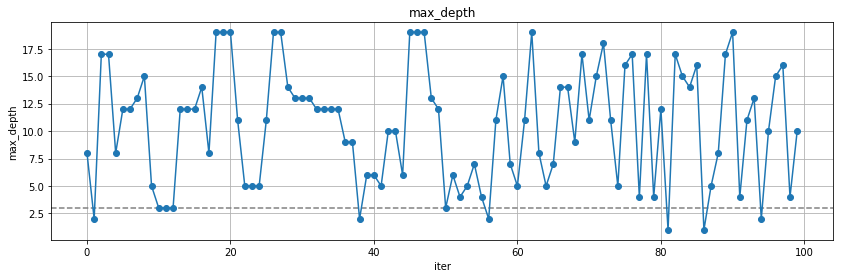

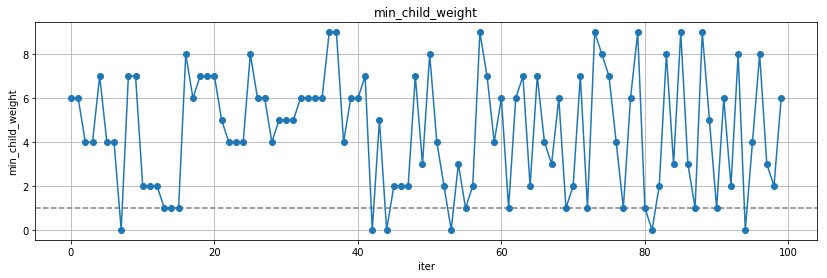

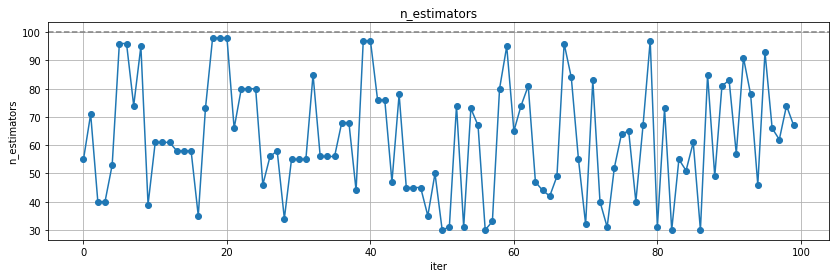

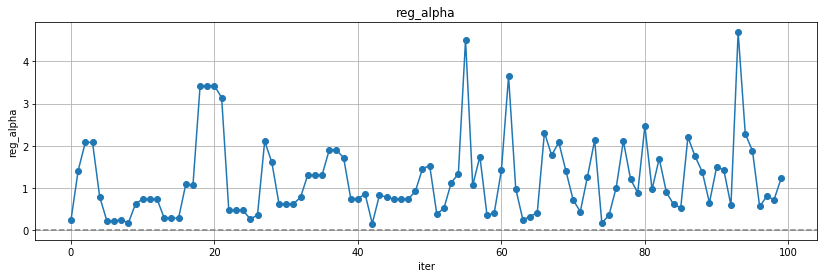

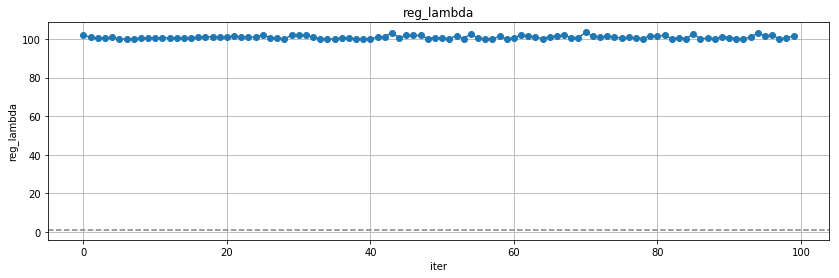

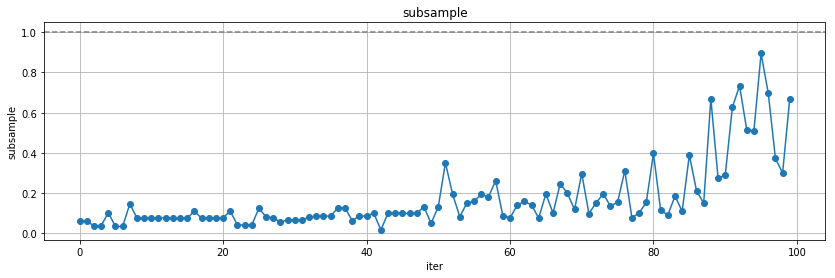

In [736]:
scip.bayes_search_results_params(clf_rand)

In [105]:
# scil.score(data, clf_rand, scoring)

In [106]:
# clf_bayes.fit(X, y, callback=on_step)

In [107]:
# scil.score(data, clf_bayes, scoring)

In [108]:
# clf_grid.fit(X, y)

In [109]:
# scil.score(data, clf_grid, scoring)

In [158]:
for name, (clf, fit_params) in clfs.items():
    print("=================  " + name + "  ====================")
    %time clf.fit(X, y, **fit_params)
    print()

=================  clf_evo  ====================
Types [1, 2, 1, 2, 2, 1, 2, 2, 2, 2] and maxint [4, 4, 4, 4, 4, 4, 4, 4, 4, 4] detected
--- Evolve in 9765625 possible combinations ---
gen	nevals	avg     	min     	max     	std     
0  	50    	0.744636	0.377809	0.841523	0.137482
1  	33    	0.814753	0.771162	0.845315	0.0204032
2  	35    	0.831313	0.778816	0.847518	0.013705 
3  	21    	0.831012	0.377809	0.849014	0.0650923
4  	30    	0.833592	0.377809	0.853047	0.0658661
5  	29    	0.843873	0.770606	0.853047	0.0140407
6  	27    	0.848101	0.779252	0.853047	0.0104115
7  	32    	0.848091	0.794919	0.856188	0.0117771
8  	31    	0.85014 	0.765226	0.856188	0.0126921
9  	35    	0.852918	0.838494	0.856188	0.0022762
10 	30    	0.852765	0.798121	0.856188	0.00792047
Best individual is: {'n_estimators': 82, 'learning_rate': 0.01, 'max_depth': 10, 'subsample': 1.0, 'gamma': 0.0001, 'min_child_weight': 2, 'reg_lambda': 1e-09, 'reg_alpha': 0.005623413251903491, 'colsample_bytree': 0.7525, 'colsample_byleve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 9.93 s, sys: 11.8 ms, total: 9.94 s
Wall time: 9.76 s



[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    9.7s finished


clf_evo
clf_bayes_gbrt
clf_bayes_gp
clf_rand


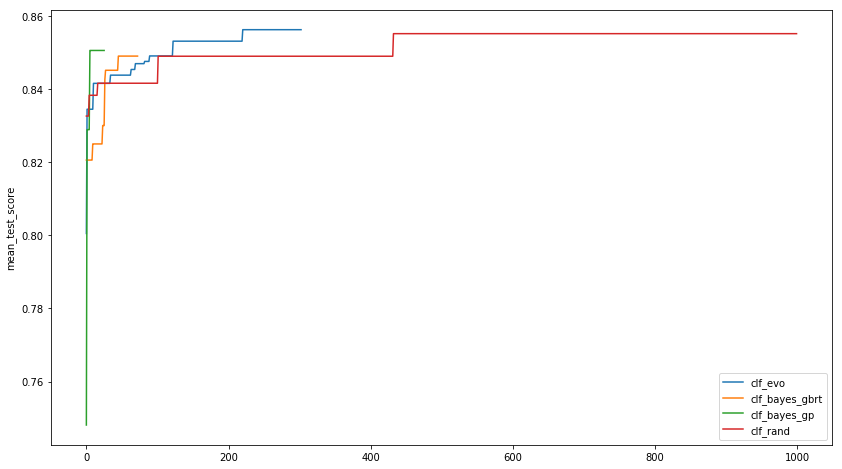

In [164]:
# plt.plot(df.mean_test_score.cummax())
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for name, (clf, fit_params) in clfs.items():
    print(name)
    df = pd.DataFrame(clf.cv_results_)
    xvals = range(len(df.mean_test_score))
    sns.lineplot(x=xvals, y=df.mean_test_score.cummax(), label=name)
# plt.plot(df.mean_test_score.cummax())


clf_evo
clf_bayes_gbrt

=============== best params ================
{'colsample_bylevel': 0.6761258480784186, 'colsample_bytree': 0.977096261137936, 'gamma': 3.213780629562081e-05, 'learning_rate': 0.010976883454663628, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 65, 'reg_alpha': 0.0001273873116593041, 'reg_lambda': 0.00030638174852738124, 'subsample': 0.9110312348479864}

============ good params (at ratio 0.990): ===============
{'colsample_bylevel': 0.4822724707375758, 'colsample_bytree': 0.7987670750983693, 'gamma': 7.15319001265389, 'learning_rate': 0.00023187995869351674, 'max_depth': 1, 'min_child_weight': 0, 'n_estimators': 53, 'reg_alpha': 8.301327733457915e-08, 'reg_lambda': 9.685309592247037, 'subsample': 0.514442942391578}

clf_bayes_gp

=============== best params ================
{'colsample_bylevel': 0.8397847187276688, 'colsample_bytree': 0.9913118133539696, 'gamma': 0.021580774845727096, 'learning_rate': 0.008804232722579394, 'max_depth': 7, 'min_child_weig

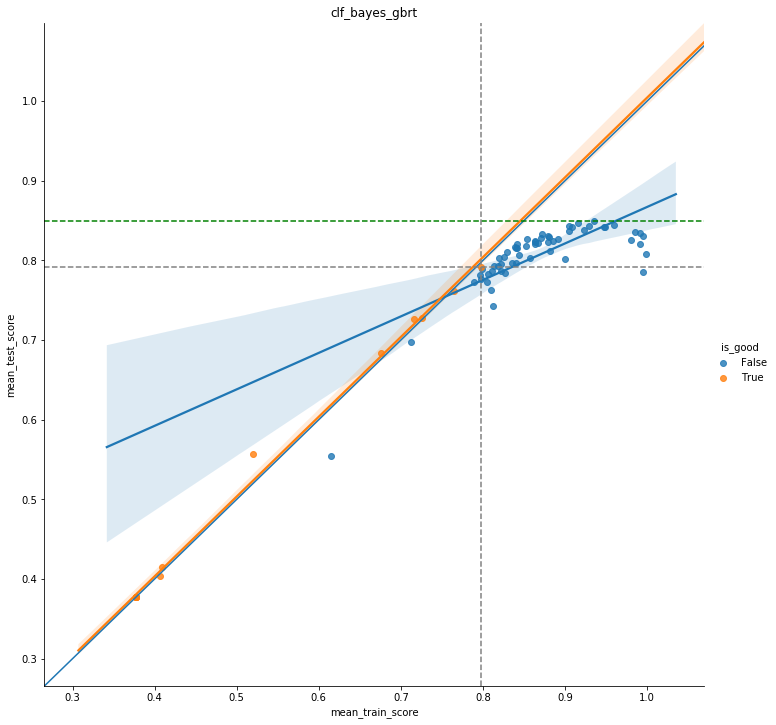

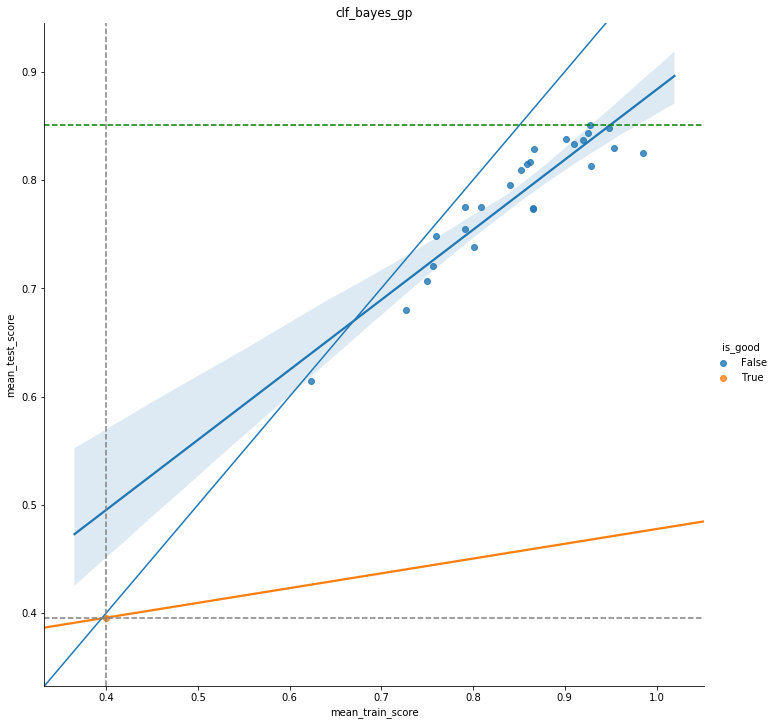

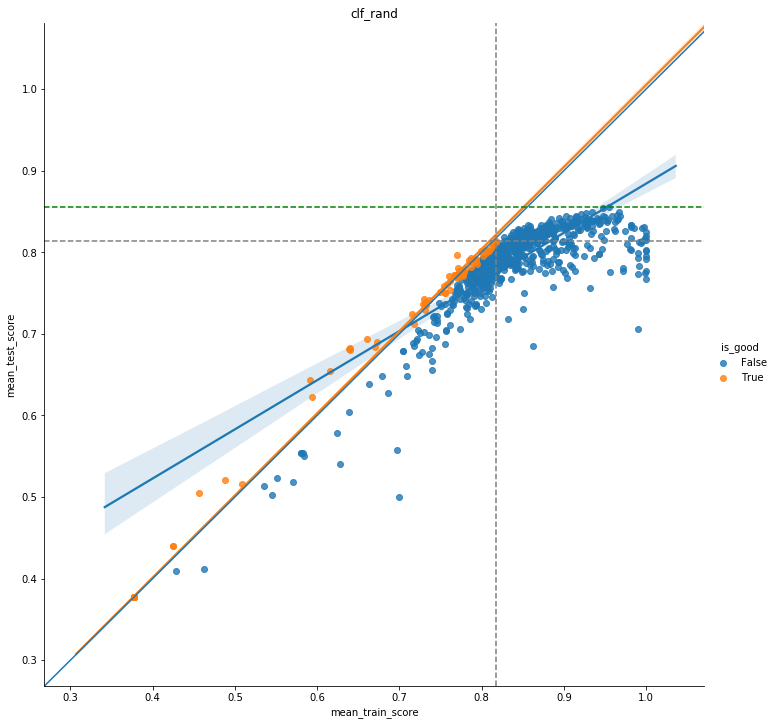

In [211]:
for name, (clf, fit_params) in clfs.items():
    print(name)
    if name == "clf_evo": # train scores are missing
        continue
    scip.bayes_search_results_scatter(clf)
    plt.title(name)

In [207]:
df = pd.DataFrame(clf_rand.cv_results_)

bins = np.linspace(df.mean_train_score.min(), df.mean_train_score.max(), 50)
idx = []
for b in bins:
    idx.append(df.query(f'mean_train_score <= {b}').sort_values("mean_test_score", ascending=False).index[0])
    
eff = df.loc[idx]
eff_params = eff.params

In [190]:
from sklearn.base import clone

df = pd.DataFrame(clf_rand.cv_results_)
top_score = df.mean_test_score.quantile(0.9)
idx = df[df.mean_test_score >= top_score].index
top_params = df.loc[idx].params
top_models = [clone(model).set_params(**p) for p in top_params]
top_models = [(str(i), model) for i, model in zip(range(len(top_models)), top_models)]

from sklearn.ensemble import *

meta = VotingClassifier(top_models, voting='soft')

# scil.score_cv(data, meta, scoring)
# scil.fit(data, meta)
# meta.fit(X, y)
# meta.score()
# cross_val_score(meta, X, y, cv=cv, scoring=scoring)


dt = scil.Data(X, y)
dd = scil.score_cv_train_test(data, meta, scoring=scoring, cv=cv)

In [191]:
dd

,train_score_mean,train_score_std,test_score_mean,test_score_std
VotingClassifier,0.94743,0.00397,0.85670,0.02193


In [119]:
df = pd.DataFrame(clf_bayes.cv_results_)
df.mean_test_score.shape

(68,)

In [110]:
# for name, (clf, fit_params) in clfs.items():
#     print("=================  " + name + "  ====================")
#     df = pd.DataFrame(clf.cv_results_)
# #     display(df.head())
#     display(scif.df_summary(df))
